# Lab 8 - Unsupervised Learning Solutions

$\color{red}{\text{RULES:}}$

1) Work individually! 

2) You can use the lecture notes (that are posted on D2L),and other materials (e.g. books, web searches).



### Question 1

Consider the loan prediction problem, for which the preprocessing (data reading/cleaning) is performed below.
- (1.a) Using sklearn library functions, perform k-means clustering with k=2. Report number of data points in each cluster.
- (1.b) Using sklearn library functions, perform hieararchical clustering which results in 2 clusters. Report number of data points in each cluster.
- (1.c) Using scipy library functions, perform hieararchical clustering and plot the resulting dendogram.
- (1.d) Standardize the data using StandardScaler() function. Repeat part (a), (b), (c)

In [ ]:
import pandas as pd

# read data
df_lp = pd.read_csv('LoanPrediction_train.csv')

# print out first 5 rows of data
#print("ORIGINAL DATA")
#print(df_lp.head())

# convert categorical variables to numericals
df_lp['Married'] =df_lp['Married'].astype('category').cat.codes
df_lp['Gender'] =df_lp['Gender'].astype('category').cat.codes
df_lp['Loan_ID'] =df_lp['Loan_ID'].astype('category').cat.codes
df_lp['Dependents'] =df_lp['Dependents'].astype('category').cat.codes
df_lp['Education'] =df_lp['Education'].astype('category').cat.codes
df_lp['Self_Employed'] =df_lp['Self_Employed'].astype('category').cat.codes
df_lp['Property_Area'] =df_lp['Property_Area'].astype('category').cat.codes
df_lp['Loan_Status'] =df_lp['Loan_Status'].astype('category').cat.codes

#handle missing values in the data set
df_lp['Gender'].fillna(df_lp['Gender'].mode()[0], inplace=True)
df_lp['Married'].fillna(df_lp['Married'].mode()[0], inplace=True)
df_lp['Dependents'].fillna(df_lp['Dependents'].mode()[0], inplace=True)
df_lp['LoanAmount'].fillna(df_lp['LoanAmount'].mode()[0], inplace=True)
df_lp['Loan_Amount_Term'].fillna(df_lp['Loan_Amount_Term'].mode()[0], inplace=True)
df_lp['Credit_History'].fillna(df_lp['Credit_History'].mode()[0], inplace=True)

df_lp = df_lp.drop('Loan_Status', axis=1) # remove target/class label column

#print("\n\n MODIFIED DATA")
#print(df_lp.head())

### Libraries

In [ ]:
# sklearn clustering libraries
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# scipy implementation for hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# plotting library
import matplotlib.pyplot as plt

# for scaling numpy array
from sklearn.preprocessing import StandardScaler

### data formating

In [ ]:
mat = df_lp.values

norm_mat = StandardScaler().fit_transform(mat)

### Solution 1.a

In [ ]:
i_nclusters = 2
km = sklearn.cluster.KMeans(n_clusters=i_nclusters, init='random', n_init=1, verbose=0)

km.fit(mat)
print(km)

# Get cluster assignment labels
labels = km.labels_

num_cluster_1 = sum(labels)
num_cluster_0 = len(labels) - sum(labels)
print("num_cluster_0-num_cluster_1", num_cluster_0, "-", num_cluster_1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)
num_cluster_0-num_cluster_1 32 - 582


### Solution 1.b

In [ ]:
# hieararchical clustering via scikit-learn
i_nclusters = 2
hc = AgglomerativeClustering(n_clusters=i_nclusters)
hc.fit(mat)
print(hc)

y_hc = hc.fit_predict(mat) # hierarchical.labels_

num_cluster_1 = sum(y_hc)
num_cluster_0 = len(y_hc) - sum(y_hc)
print("num_cluster_0-num_cluster_1", num_cluster_0, "-", num_cluster_1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')
num_cluster_0-num_cluster_1 607 - 7


### Solution 1.c

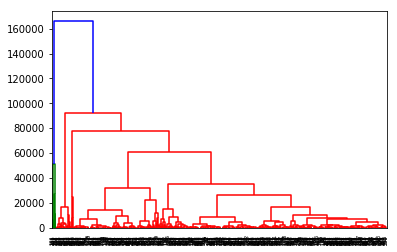

In [ ]:
link_c = linkage(mat, method='ward')
plt.figure()
dendrogram(link_c) # plot dendogram (binary clustering tree)
plt.show()

### Solution 1.d

#### repeat 1.a

In [ ]:
i_nclusters = 2
km = sklearn.cluster.KMeans(n_clusters=i_nclusters, init='random', n_init=1, verbose=0)

km.fit(norm_mat)
print(km)

# Get cluster assignment labels
labels = km.labels_

num_cluster_1 = sum(labels)
num_cluster_0 = len(labels) - sum(labels)
print("num_cluster_0-num_cluster_1", num_cluster_0, "-", num_cluster_1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)
num_cluster_0-num_cluster_1 244 - 370


#### repeat 1.b

In [ ]:
# hieararchical clustering via scikit-learn
i_nclusters = 2
hc = AgglomerativeClustering(n_clusters=i_nclusters)
hc.fit(norm_mat)
print(hc)

y_hc = hc.fit_predict(norm_mat) # hierarchical.labels_

num_cluster_1 = sum(y_hc)
num_cluster_0 = len(y_hc) - sum(y_hc)
print("num_cluster_0-num_cluster_1", num_cluster_0, "-", num_cluster_1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')
num_cluster_0-num_cluster_1 583 - 31


#### repeat 1.c

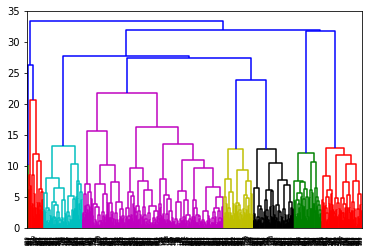

In [ ]:
link_c = linkage(norm_mat, method='ward')
plt.figure()
dendrogram(link_c) # plot dendogram (binary clustering tree)
plt.show()